# Ethereum Price Change Analysis - NYU ML Club Workshop #1

In [1]:
#  libraries we will use throughout
import numpy as np
import pandas as pd

import scipy as sc
from scipy.stats import norm, skew, zscore

from sklearn import datasets, linear_model, preprocessing

from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#  Command to read dataset. Either provide URL or path where dataset is stored.
#  If you'll have values of format such as 1,000.00, @thousands param transforms it as 1000.00. 
df = pd.read_csv('/home/peterson/Documents/ML/datasets/eth_data.csv', 
                thousands=",")

#  Limiting floats output to 4 decimal points. 
pd.set_option('display.float_format', lambda x: '{:.4f}'.format(x))

In [3]:
#  df.shape[0] is the # of rows and df.shape[1] is the # of cols
#  each row is one example
#  each column is a feature of our data example
print('Initial shape of our data matrix: {}'.format(df.shape))

Initial shape of our data matrix: (762, 7)


In [4]:
#  check data type of each column in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 7 columns):
Date        762 non-null object
Price       762 non-null float64
Open        762 non-null float64
High        762 non-null float64
Low         762 non-null float64
Volume      762 non-null object
Change %    762 non-null object
dtypes: float64(4), object(3)
memory usage: 41.7+ KB


In [6]:
df.sample(4)

,Date,Price,Open,High,Low,Volume,Change %
621,"Mar 14, 2017",28.6600,28.4000,29.9300,27.0000,200.54K,0.92%
119,"Jul 29, 2018",466.4700,469.1400,472.1500,461.3900,42.39K,-0.66%
261,"Mar 09, 2018",724.6100,697.3000,727.8100,639.0400,229.75K,3.92%
224,"Apr 15, 2018",534.0400,502.4300,534.1800,502.4300,242.20K,6.32%


<p>In our dataset we see 'Volume', 'Date' and 'Change %' columns to be considered as an object.</p>
<p>Scikit algos and basic data visualization needs the columns to be either float or int.</p>
<p>Let's do some data mingle.</p>

In [7]:
#  peak into your dataset
df.head(4)

,Date,Price,Open,High,Low,Volume,Change %
0,"Nov 25, 2018",118.8300,114.9900,121.1000,103.5100,1.18M,3.03%
1,"Nov 24, 2018",115.3300,125.0700,129.6100,111.9700,577.65K,-7.91%
2,"Nov 23, 2018",125.2400,126.2700,128.4000,120.0000,675.20K,-1.71%
3,"Nov 22, 2018",127.4200,138.5500,140.1800,127.1800,349.52K,-7.87%


In [8]:
#  Notice how Date is in descending order. Usually, we would like to have dataset to be in ascending order.
#  Trivial solution:
df.sort_values(by='Date', ascending=True)

,Date,Price,Open,High,Low,Volume,Change %
603,"Apr 01, 2017",50.5900,49.7200,51.8700,48.7000,110.41K,1.75%
238,"Apr 01, 2018",378.6700,393.3700,398.8400,358.0100,325.75K,-3.64%
602,"Apr 02, 2017",48.6000,50.5900,51.5900,47.7000,224.17K,-3.93%
237,"Apr 02, 2018",385.5000,378.6800,393.9900,375.2600,196.17K,1.80%
601,"Apr 03, 2017",44.2800,48.6000,48.6000,42.7700,334.41K,-8.89%
236,"Apr 03, 2018",415.4300,386.1600,417.8800,379.8300,223.28K,7.76%
600,"Apr 04, 2017",44.4100,44.2800,45.6900,41.0500,217.96K,0.29%
235,"Apr 04, 2018",377.9900,415.4100,416.5400,369.8200,256.60K,-9.01%
599,"Apr 05, 2017",45.3500,44.4100,47.5300,44.1900,161.26K,2.12%
234,"Apr 05, 2018",380.9800,378.0000,387.1000,366.1200,182.50K,0.79%


In [9]:
#  however, this poses problem since our date-format is DD/MM/YY
#  Pandas provides function to standardize your date format to YYYY-MM-DD
df.Date = pd.to_datetime(df["Date"])

df.sort_values(by='Date', ascending=True, inplace=True)

In [13]:
df.head(4)
df.tail(10)

,Date,Price,Open,High,Low,Volume,Change %
9,2018-11-16,177.2600,183.5400,184.6600,173.8200,301.04K,-3.80%
8,2018-11-17,175.9000,176.9900,177.5200,174.2200,99.38K,-0.77%
7,2018-11-18,178.9500,176.4000,182.0000,176.2000,151.57K,1.73%
6,2018-11-19,151.4000,178.8000,178.8000,148.4800,930.87K,-15.40%
5,2018-11-20,134.6500,151.1400,154.1700,128.1500,1.50M,-11.06%
4,2018-11-21,138.3100,134.0400,141.3900,127.6300,834.37K,2.72%
3,2018-11-22,127.4200,138.5500,140.1800,127.1800,349.52K,-7.87%
2,2018-11-23,125.2400,126.2700,128.4000,120.0000,675.20K,-1.71%
1,2018-11-24,115.3300,125.0700,129.6100,111.9700,577.65K,-7.91%
0,2018-11-25,118.8300,114.9900,121.1000,103.5100,1.18M,3.03%


In [14]:
#  create a function 
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
#     if 'B' in x:
#         return float(x.replace('B', '')) * 1000000000
    return 0.0

#  apply that function to each data point in Volume column
# df.Volume = df.Volume.apply(value_to_float)
df["Volume"] = df["Volume"].apply(value_to_float)

In [15]:
df.head(4)

,Date,Price,Open,High,Low,Volume,Change %
761,2016-10-25,11.3600,11.9900,12.0000,11.1200,32240.0000,-5.25%
760,2016-10-26,11.5000,11.3600,11.7200,11.3600,19330.0000,1.23%
759,2016-10-27,11.5700,11.5000,11.6600,11.2300,31570.0000,0.61%
758,2016-10-28,11.1500,11.5700,11.7000,10.8500,54850.0000,-3.63%


<p>Last column treated as an object is "Change %". Instead of coming up with a new algo, we will simply drop it and re-create it.</p>

In [16]:
#  axis=1 as our param means that I'd like to drop column as opposed to row
#  inplace=True is same as saying df = df.drop(['Change %'], axis=1)
df.drop(['Change %'], axis=1, inplace=True)

df.dtypes

Date      datetime64[ns]
Price            float64
Open             float64
High             float64
Low              float64
Volume           float64
dtype: object

<p>At this point, we're done with transforming our data set into proper types.</p>
<p>Now is the time for some feature creation, spliting our dataset and first data analysis.</p>

In [20]:
#  library which creates features given our dataset
#  link: https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#
from ta import *

#  ta library is fully compatible with Pandas library. It makes very easy to compute technical indicators
#  which we will use for our type of analysis.
#  One more detail to point out. In this workshop we're not predicting Ethereum price but only probability
#  of a price movement. 
df['rsi'] = rsi(df["Price"], n=14, fillna=True)
df['stoch'] = stoch(df["High"], df["Low"], df["Price"], n=14, fillna=True)
df['stochCh'] = daily_return(df["stoch"], fillna=True)
df['stoch_sig'] = stoch_signal(df["High"], df["Low"], df["Price"], n=14, d_n=3, fillna=True)
df['obv'] = on_balance_volume(df["Price"], df["Volume"], fillna=True)
df['ema20'] = ema_indicator(df["Price"], n=20, fillna=True)
df['ema20ch'] = daily_return(df["ema20"], fillna=True)
df['ema50'] = ema_indicator(df["Price"], n=50, fillna=True)
df['ema100'] = ema_indicator(df["Price"], n=100, fillna=True)
df['ema50ch'] = daily_return(df["ema100"], fillna=True)
df['ema100ch'] = daily_return(df["ema50"], fillna=True)
df['trix'] = trix(df["Price"],n=15, fillna=True)
df['macd'] = macd(df["Price"], n_fast=12, n_slow=20, fillna=True)
df['cmf'] = chaikin_money_flow(df["High"], df["Low"], df["Price"], df["Volume"], n=20, fillna=True)
df['adi'] = acc_dist_index(df["High"], df["Low"], df["Price"], df["Volume"], fillna=True)
df['ao'] = ao(df["High"], df["Low"], s=5, l=23, fillna=True)
df['mfi'] = money_flow_index(df["High"], df["Low"], df["Price"], df["Volume"], n=14, fillna=True)
df['Change'] = daily_return(df["Price"], fillna=True)  #  our target variable

In [21]:
df.sample(5)
df.shape

(762, 24)

<p>Change column has Day to Day change of ETH price.</p>
<p>Our goal is to predict whether ETH will go up in price the next day, given today's technical indicators.</p>
<p>We need to shift 'Change' column by one data point up and we will drop the last row.</p>

In [23]:
df.tail(10)

,Date,Price,Open,High,Low,Volume,rsi,stoch,stochCh,stoch_sig,...,ema100,ema50ch,ema100ch,trix,macd,cmf,adi,ao,mfi,Change
9,2018-11-16,177.2600,183.5400,184.6600,173.8200,301040.0000,16.4611,9.8224,-57.4120,16.7931,...,258.1837,-0.6292,-0.7120,-0.1045,-3.3406,-0.0719,112341.6996,-8.8142,17.8054,-3.8042
8,2018-11-17,175.9000,176.9900,177.5200,174.2200,99380.0000,15.8426,7.2535,-26.1538,13.3799,...,256.5543,-0.6311,-0.7138,-0.1604,-4.4065,-0.0742,-108167.1130,-14.9051,17.6298,-0.7672
7,2018-11-18,178.9500,176.4000,182.0000,176.2000,151570.0000,23.3002,13.0147,79.4271,10.0302,...,255.0176,-0.5990,-0.6347,-0.2188,-4.9791,-0.0410,-6032.9185,-20.1796,14.2279,1.7339
6,2018-11-19,151.4000,178.8000,178.8000,148.4800,930870.0000,12.1129,3.8160,-70.6794,8.0281,...,252.9658,-0.8046,-1.1230,-0.3020,-6.9592,-0.2031,-759412.9674,-24.5641,11.7563,-15.3954
5,2018-11-20,134.6500,151.1400,154.1700,128.1500,1500000.0000,9.0609,6.7114,75.8757,7.8474,...,250.6229,-0.9262,-1.4044,-0.4139,-9.3548,-0.2958,-1502149.6195,-29.7076,4.6757,-11.0634
4,2018-11-21,138.3100,134.0400,141.3900,127.6300,834370.0000,14.4928,11.4975,71.3123,7.3416,...,248.3989,-0.8874,-1.2991,-0.5368,-10.8373,-0.1967,-289732.5843,-35.7814,16.3433,2.7182
3,2018-11-22,127.4200,138.5500,140.1800,127.1800,349520.0000,12.0266,0.2716,-97.6373,6.1602,...,246.0032,-0.9644,-1.4738,-0.6722,-12.4516,-0.2425,124229.2492,-41.4583,15.9565,-7.8736
2,2018-11-23,125.2400,126.2700,128.4000,120.0000,675200.0000,11.5717,5.4852,1919.2348,5.7514,...,243.6119,-0.9721,-1.4797,-0.8124,-13.6329,-0.1972,-169422.2652,-49.2885,14.9127,-1.7109
1,2018-11-24,115.3300,125.0700,129.6100,111.9700,577650.0000,9.6562,3.2851,-40.1096,3.0140,...,241.0717,-1.0427,-1.6391,-0.9595,-14.9182,-0.2451,-190400.4762,-54.4524,12.8607,-7.9128
0,2018-11-25,118.8300,114.9900,121.1000,103.5100,1180000.0000,15.3654,13.8342,321.1198,7.5348,...,238.6510,-1.0041,-1.5307,-1.1015,-15.4786,-0.1215,517847.7341,-56.3376,22.8080,3.0348


In [24]:
#  shift up Price Change by one and drop the last row
df["Change"] = df["Change"].shift(-1)

In [25]:
def show_missing(df):
    all_data_na = (df.isnull().sum() / len(df)) * 100
    all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=True)[:30]
    missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
    missing_data.head(20)
    all_data_na = (df.isnull().sum() / len(df)) * 100
    print(all_data_na)
    
show_missing(df)

Date        0.0000
Price       0.0000
Open        0.0000
High        0.0000
Low         0.0000
Volume      0.0000
rsi         0.0000
stoch       0.0000
stochCh     0.0000
stoch_sig   0.0000
obv         0.0000
ema20       0.0000
ema20ch     0.0000
ema50       0.0000
ema100      0.0000
ema50ch     0.0000
ema100ch    0.0000
trix        0.0000
macd        0.0000
cmf         0.0000
adi         0.0000
ao          0.0000
mfi         0.0000
Change      0.1312
dtype: float64


In [26]:
df.tail(3)

,Date,Price,Open,High,Low,Volume,rsi,stoch,stochCh,stoch_sig,...,ema100,ema50ch,ema100ch,trix,macd,cmf,adi,ao,mfi,Change
2,2018-11-23,125.2400,126.2700,128.4000,120.0000,675200.0000,11.5717,5.4852,1919.2348,5.7514,...,243.6119,-0.9721,-1.4797,-0.8124,-13.6329,-0.1972,-169422.2652,-49.2885,14.9127,-7.9128
1,2018-11-24,115.3300,125.0700,129.6100,111.9700,577650.0000,9.6562,3.2851,-40.1096,3.0140,...,241.0717,-1.0427,-1.6391,-0.9595,-14.9182,-0.2451,-190400.4762,-54.4524,12.8607,3.0348
0,2018-11-25,118.8300,114.9900,121.1000,103.5100,1180000.0000,15.3654,13.8342,321.1198,7.5348,...,238.6510,-1.0041,-1.5307,-1.1015,-15.4786,-0.1215,517847.7341,-56.3376,22.8080,nan


In [27]:
# df['Change'].fillna(df['Change'].median(), inplace=True)
# df.tail()
df = df[:-1]

In [28]:
df.dtypes

Date         datetime64[ns]
Price               float64
Open                float64
High                float64
Low                 float64
Volume              float64
rsi                 float64
stoch               float64
stochCh             float64
stoch_sig           float64
obv                 float64
ema20               float64
ema20ch             float64
ema50               float64
ema100              float64
ema50ch             float64
ema100ch            float64
trix                float64
macd                float64
cmf                 float64
adi                 float64
ao                  float64
mfi                 float64
Change              float64
dtype: object

<p>Now is the time to analyze our dataset</p>

<p>
<ul>
    <li>1. Collinearity</li>
    <li>2. Correlation of error terms</li>
    <li>3. Non-constant variance of error terms</li>
    <li>4. Outliers</li>
    <li>5. High-leverage points</li>
    <li>6. Non-linearity of the response-predictor relationships</li>
</ul>
</p>

In [29]:
from sklearn import svm, tree, linear_model

y = df['Change']
target = (y >= 1).astype(int)

In [31]:
#Machine Learning Algorithm (MLA) Selection and Initialization
def test_model(X,y):
    MLA = [
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
 
    #SVM
    svm.SVC(),
    svm.NuSVC(),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),    
    ]
    
    #split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
    #note: this is an alternative to train_test_split
    cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .7, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

    #create table to compare MLA metrics
    MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Time']
    MLA_compare = pd.DataFrame(columns = MLA_columns)

    #create table to compare MLA predictions
    MLA_predict = df['Change']

    #index through MLA and save performance to table
    row_index = 0
    for alg in MLA:

        #set name and parameters
        MLA_name = alg.__class__.__name__
        MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
        MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())

        #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
        cv_results = model_selection.cross_validate(alg, X, y, cv = cv_split)

        MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
        MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
        MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   

        #save MLA predictions - see section 6 for usage
        alg.fit(X, y)
        MLA_predict[MLA_name] = alg.predict(X)

        row_index+=1

    #print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
    MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
    return MLA_compare

In [33]:
X1 = df.drop(['Date', 'Change'], axis=1)
test_model(X1, target)

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Time
5,SVC,"{'kernel': 'rbf', 'C': 1.0, 'verbose': False, ...",1.0000,0.6253,0.0200
6,NuSVC,"{'kernel': 'rbf', 'verbose': False, 'probabili...",1.0000,0.6253,0.0233
0,LogisticRegressionCV,"{'scoring': None, 'n_jobs': None, 'verbose': 0...",0.6195,0.6039,0.1554
2,RidgeClassifierCV,"{'normalize': False, 'alphas': array([ 0.1, 1...",0.6338,0.5908,0.0144
4,Perceptron,"{'warm_start': False, 'n_iter': None, 'n_jobs'...",0.5440,0.5672,0.0028
8,DecisionTreeClassifier,"{'presort': False, 'splitter': 'best', 'min_im...",1.0000,0.5376,0.0159
9,ExtraTreeClassifier,"{'splitter': 'random', 'min_impurity_decrease'...",1.0000,0.5376,0.0026
1,PassiveAggressiveClassifier,"{'warm_start': False, 'loss': 'hinge', 'C': 1....",0.5367,0.5214,0.0029
3,SGDClassifier,"{'n_jobs': None, 'shuffle': True, 'verbose': 0...",0.5071,0.5131,0.0040
7,LinearSVC,"{'loss': 'squared_hinge', 'C': 1.0, 'verbose':...",0.5128,0.5079,0.0796


#  Issue 1: Colliniarity

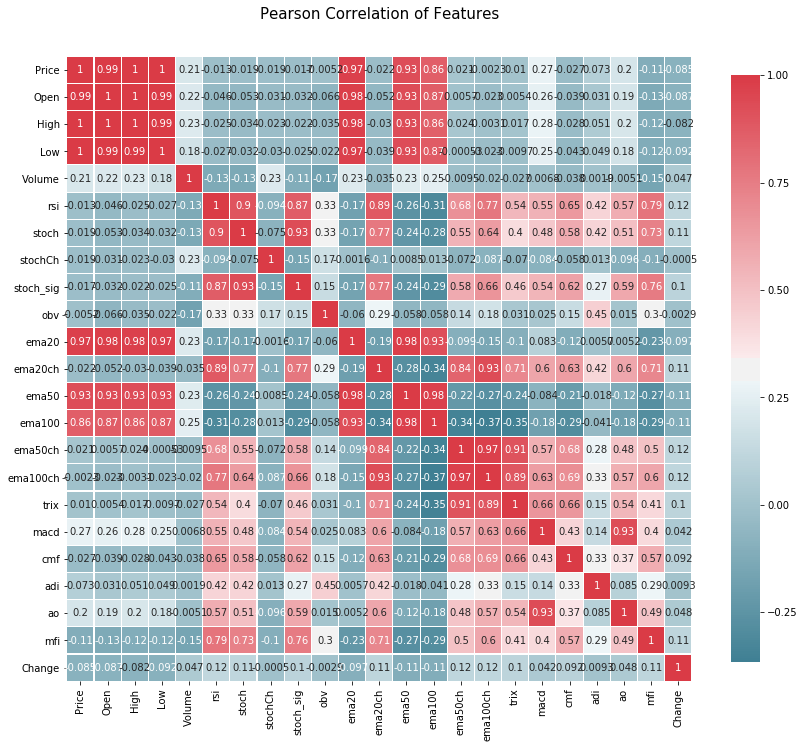

In [34]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':10 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df)


<p> VIF source: https://onlinecourses.science.psu.edu/stat501/node/347/ </p>

In [35]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import Imputer
from statsmodels.stats.outliers_influence import variance_inflation_factor

class ReduceVIF(BaseEstimator, TransformerMixin):
    def __init__(self, thresh=5.0, impute=True, impute_strategy='median'):
        # From looking at documentation, values between 5 and 10 are "okay".
        # Above 10 is too high and so should be removed.
        self.thresh = thresh
        
        # The statsmodel function will fail with NaN values, as such we have to impute them.
        # By default we impute using the median value.
        # This imputation could be taken out and added as part of an sklearn Pipeline.
        if impute:
            self.imputer = Imputer(strategy=impute_strategy)

    def fit(self, X, y=None):
        print('ReduceVIF fit')
        if hasattr(self, 'imputer'):
            self.imputer.fit(X)
        return self

    def transform(self, X, y=None):
        print('ReduceVIF transform')
        columns = X.columns.tolist()
        if hasattr(self, 'imputer'):
            X = pd.DataFrame(self.imputer.transform(X), columns=columns)
        return ReduceVIF.calculate_vif(X, self.thresh)

    @staticmethod
    def calculate_vif(X, thresh=5.0):
        # Taken from https://stats.stackexchange.com/a/253620/53565 and modified
        dropped=True
        while dropped:
            variables = X.columns
            dropped = False
            vif = [variance_inflation_factor(X[variables].values, X.columns.get_loc(var)) for var in X.columns]
            
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                print('Dropping {} with vif={}'.format(X.columns[maxloc], max_vif))
                X = X.drop([X.columns.tolist()[maxloc]], axis=1)
                dropped=True
        return X

In [36]:
red = ReduceVIF()
df2 = red.calculate_vif(df.drop(['Date', 'Change'], axis=1), 10)

Dropping ema50 with vif=7361.67253035
Dropping High with vif=2553.63707503
Dropping Price with vif=1027.4633057
Dropping Open with vif=830.881875282
Dropping ema100ch with vif=623.460001152
Dropping Low with vif=233.241797455
Dropping ema100 with vif=95.0073477194
Dropping stoch_sig with vif=74.1198508293
Dropping rsi with vif=59.6127120392
Dropping stoch with vif=15.7286179103
Dropping ema50ch with vif=14.4052102399
Dropping macd with vif=13.3087957989


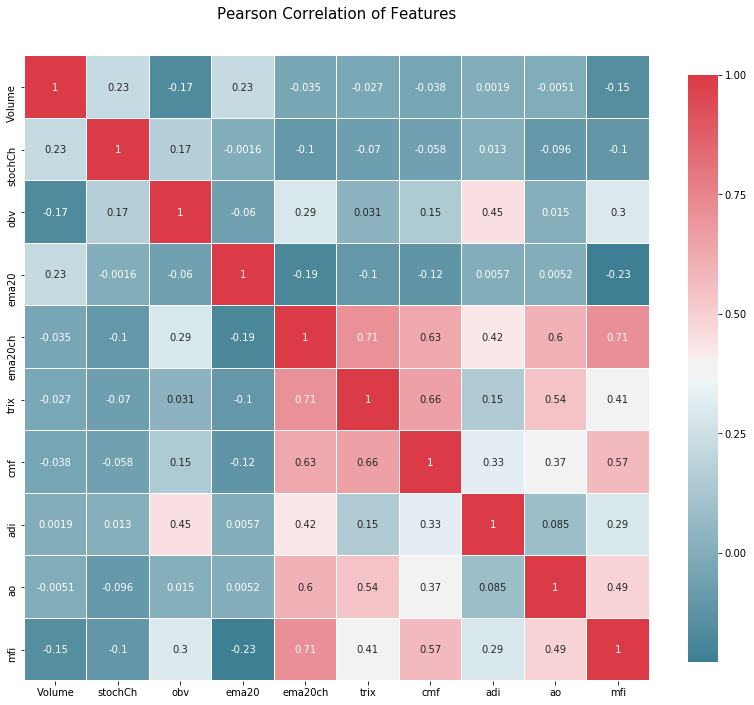

In [37]:
correlation_heatmap(df2)

In [38]:
# df2.info()
test_model(df2, target)

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Time
5,SVC,"{'kernel': 'rbf', 'C': 1.0, 'verbose': False, ...",1.0000,0.6253,0.0149
6,NuSVC,"{'kernel': 'rbf', 'verbose': False, 'probabili...",1.0000,0.6253,0.0205
0,LogisticRegressionCV,"{'scoring': None, 'n_jobs': None, 'verbose': 0...",0.6150,0.6074,0.1001
2,RidgeClassifierCV,"{'normalize': False, 'alphas': array([ 0.1, 1...",0.6197,0.6052,0.0036
8,DecisionTreeClassifier,"{'presort': False, 'splitter': 'best', 'min_im...",1.0000,0.5520,0.0061
4,Perceptron,"{'warm_start': False, 'n_iter': None, 'n_jobs'...",0.5325,0.5476,0.0017
7,LinearSVC,"{'loss': 'squared_hinge', 'C': 1.0, 'verbose':...",0.5498,0.5410,0.0336
9,ExtraTreeClassifier,"{'splitter': 'random', 'min_impurity_decrease'...",1.0000,0.5397,0.0017
3,SGDClassifier,"{'n_jobs': None, 'shuffle': True, 'verbose': 0...",0.5310,0.5096,0.0020
1,PassiveAggressiveClassifier,"{'warm_start': False, 'loss': 'hinge', 'C': 1....",0.5180,0.4904,0.0017


#Outliers

In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 761 entries, 761 to 1
Data columns (total 10 columns):
Volume     761 non-null float64
stochCh    761 non-null float64
obv        761 non-null float64
ema20      761 non-null float64
ema20ch    761 non-null float64
trix       761 non-null float64
cmf        761 non-null float64
adi        761 non-null float64
ao         761 non-null float64
mfi        761 non-null float64
dtypes: float64(10)
memory usage: 85.4 KB


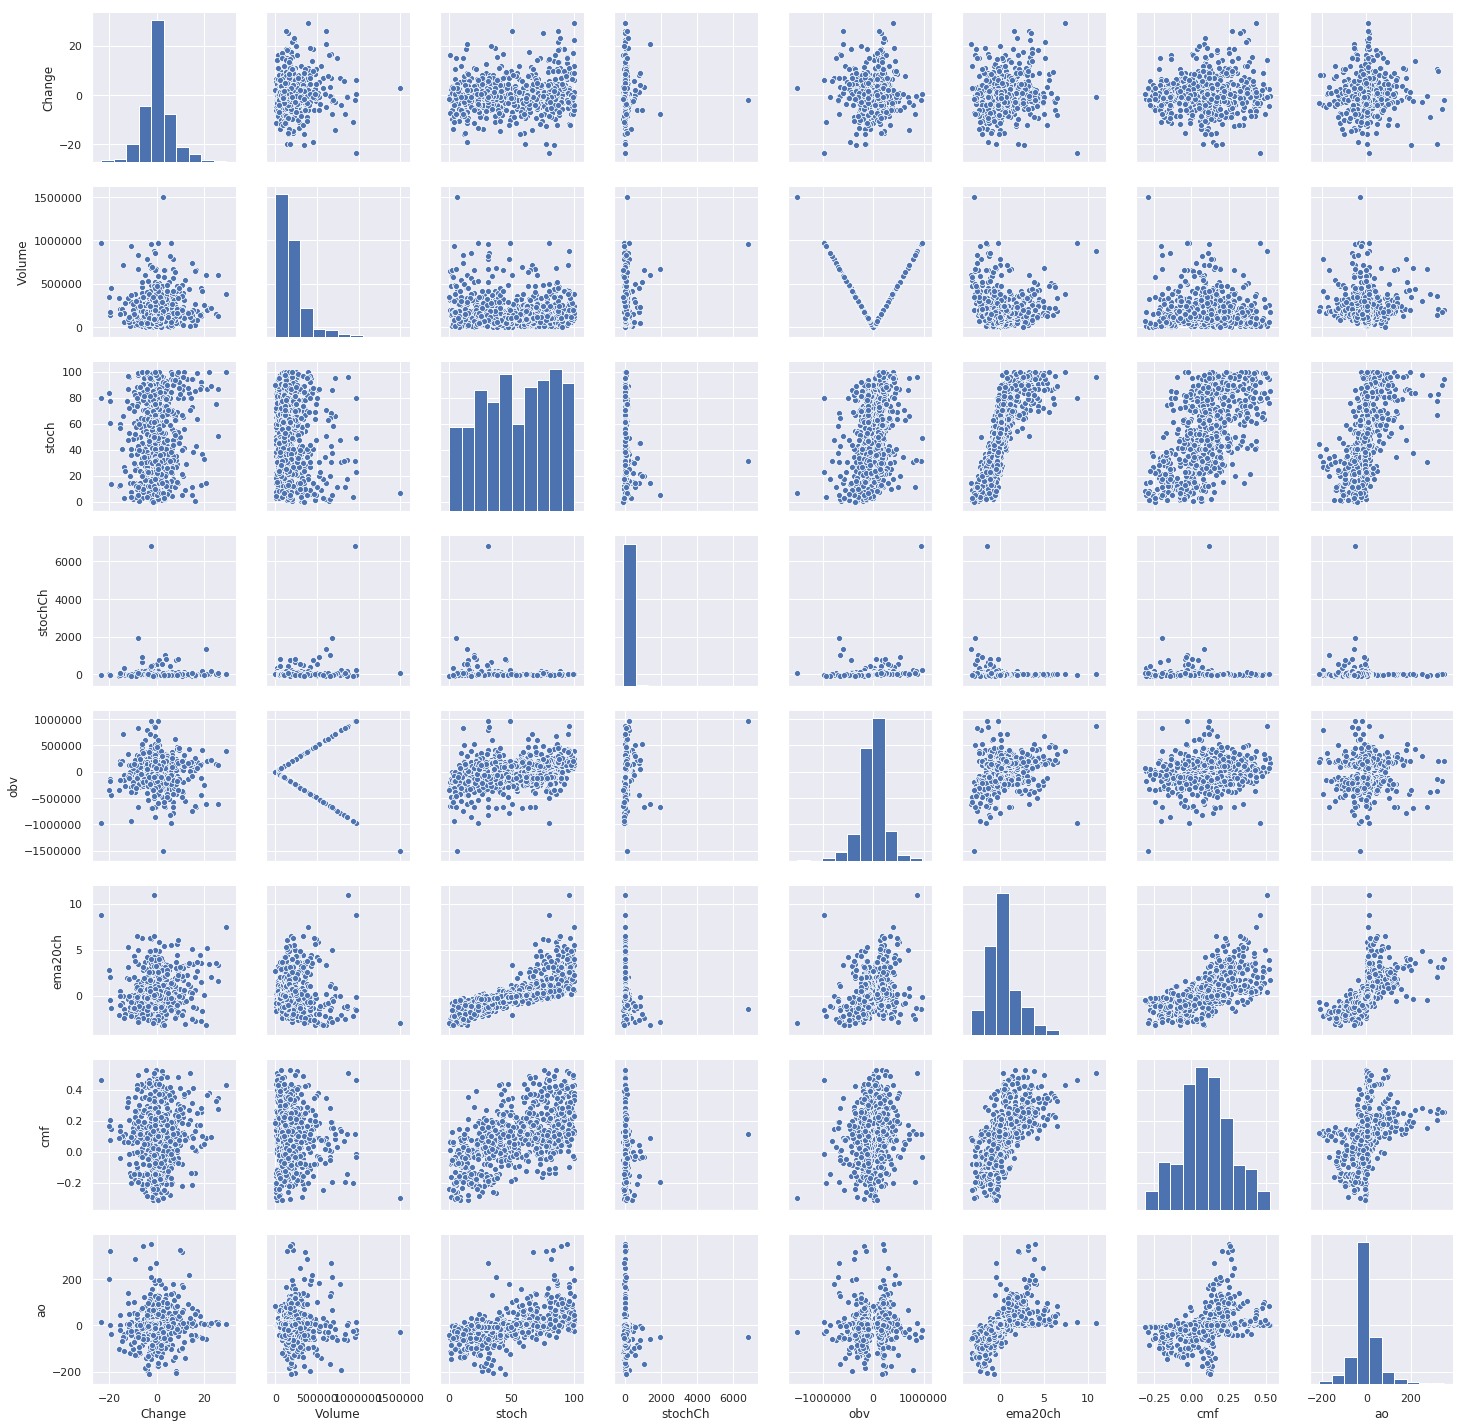

In [40]:
#  since we have continuous values, we will use scatter plot to visualize outliers
#  let's concat change to our df2
sns.set()
cols = ['Change','Volume', 'stoch', 'stochCh', 'obv', 'ema20ch', 'cmf', 'ao']
sns.pairplot(df[cols], size = 2.5)
plt.show();

In [42]:
z = np.abs(sc.stats.zscore(df2))
print(z)

[[0.92905148 0.10797863 0.03769038 ... 0.17759759 0.03084928 0.01515165]
 [1.00480055 0.10797863 0.11335245 ... 0.27683704 0.03084928 0.01515165]
 [0.93298268 0.10797863 0.16126263 ... 0.10397176 0.03084928 0.01515165]
 ...
 [0.93258029 0.45821254 1.33041132 ... 0.47297639 0.67849329 2.16097503]
 [2.84349883 6.77648934 2.60519779 ... 1.06484207 0.80081361 2.22676993]
 [2.27112686 0.25185546 2.22336464 ... 1.1747025  0.88148207 2.35610804]]


In [43]:
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Volume    148710.0000
stochCh       32.1410
obv       301450.0000
ema20        412.6487
ema20ch        1.7431
trix           1.7158
cmf            0.2082
adi       152720.0558
ao            32.8420
mfi           22.7121
dtype: float64
